In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
result_GANs = {
    'name': ['sw', 'rp', 're', 'pm', 'pl', 'lp', 'cp', 'cf', 'cd', 'cb'],
    'precision': [1.000000, 1.000000, 1, 0.500000, 0.500000, 1.000000, 0.5000, 0.500000, 1, 1],
    'recall': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'f1_score': [1.000000, 1.000000, 1, 0.666667, 0.666667, 1.000000, 0.6666, 0.666667, 1, 1],
    'min_lag': [16.0, 67.0, 24.0, 36.0, 36.0, 0.0, 42, 60.0, 51.0, 60.0]
}
df_GANs = pd.DataFrame(result_GANs)

In [28]:
df_GANs

,name,precision,recall,f1_score,min_lag
0,sw,1.0,1.0,1.000000,16.0
1,rp,1.0,1.0,1.000000,67.0
2,re,1.0,1.0,1.000000,24.0
3,pm,0.5,1.0,0.666667,36.0
4,pl,0.5,1.0,0.666667,36.0
5,lp,1.0,1.0,1.000000,0.0
6,cp,0.5,1.0,0.666600,42.0
7,cf,0.5,1.0,0.666667,60.0
8,cd,1.0,1.0,1.000000,51.0
9,cb,1.0,1.0,1.000000,60.0


In [ ]:
"""
cd: 1-1-1, 69
cb: 1-1-1.69
cf: 1-1-1, 137
re: 0.5-1-0.66, 10
cp: .5 -1-0.66, 52
rp 1-1-1, 50
lp: 1-1-1, 104
sw: 1-1-1, 47
pl: 1-1-1, 64
pm: 1-1-1, 64
"""

In [6]:
result_prefixCDD = {
    'name': ['sw', 'rp', 're', 'pm', 'pl', 'lp', 'cp', 'cf', 'cd', 'cb'],
    'precision': [1.000000, 1.000000, 0.500000, 1, 1, 1.000000, 0.5, 1, 1, 1],
    'recall': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1.0, 1.0, 1.0],
    'f1_score': [1.000000, 1.000000, 0.666667, 1, 1, 1, 0.66, 1, 1, 1],
    'min_lag': [69,69,137,10,52,50,104,47,64,64]
}
df_prefixCDD = pd.DataFrame(result_prefixCDD)

In [7]:
df_prefixCDD

,name,precision,recall,f1_score,min_lag
0,sw,1.0,1.0,1.000000,69
1,rp,1.0,1.0,1.000000,69
2,re,0.5,1.0,0.666667,137
3,pm,1.0,1.0,1.000000,10
4,pl,1.0,1.0,1.000000,52
5,lp,1.0,1.0,1.000000,50
6,cp,0.5,1.0,0.660000,104
7,cf,1.0,1.0,1.000000,47
8,cd,1.0,1.0,1.000000,64
9,cb,1.0,1.0,1.000000,64


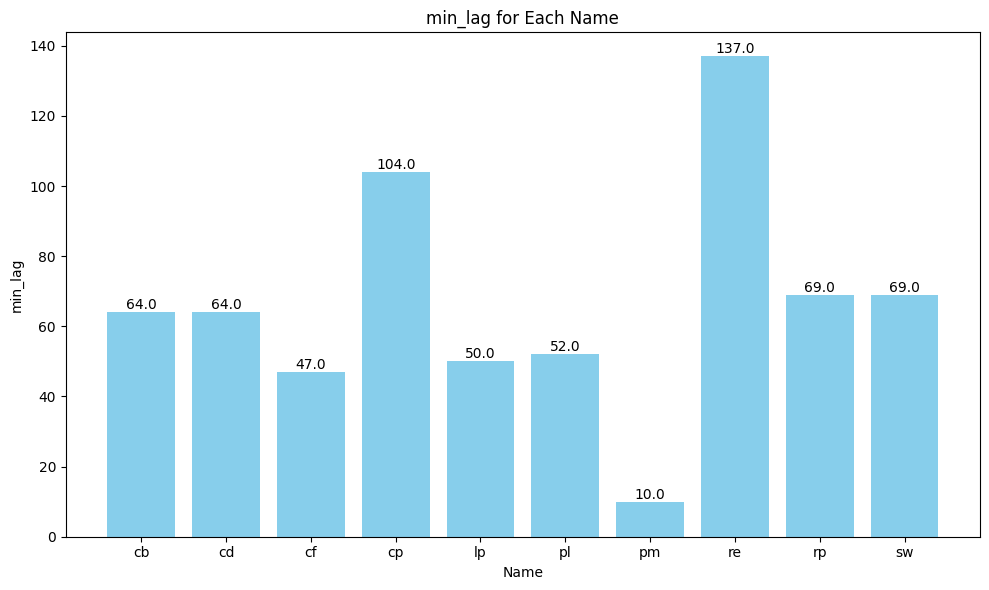

In [20]:
df_plot = df_prefixCDD.dropna(subset=['min_lag']).copy()

# For duplicate names, like 're', we'll take the mean min_lag for simplicity
df_plot = df_plot.groupby('name')['min_lag'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_plot['name'], df_plot['min_lag'], color='skyblue')

# Add labels and title
plt.xlabel('Name')
plt.ylabel('min_lag')
plt.title('min_lag for Each Name')

# Add the value on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
print(df_prefixCDD['min_lag'].mean())

66.6


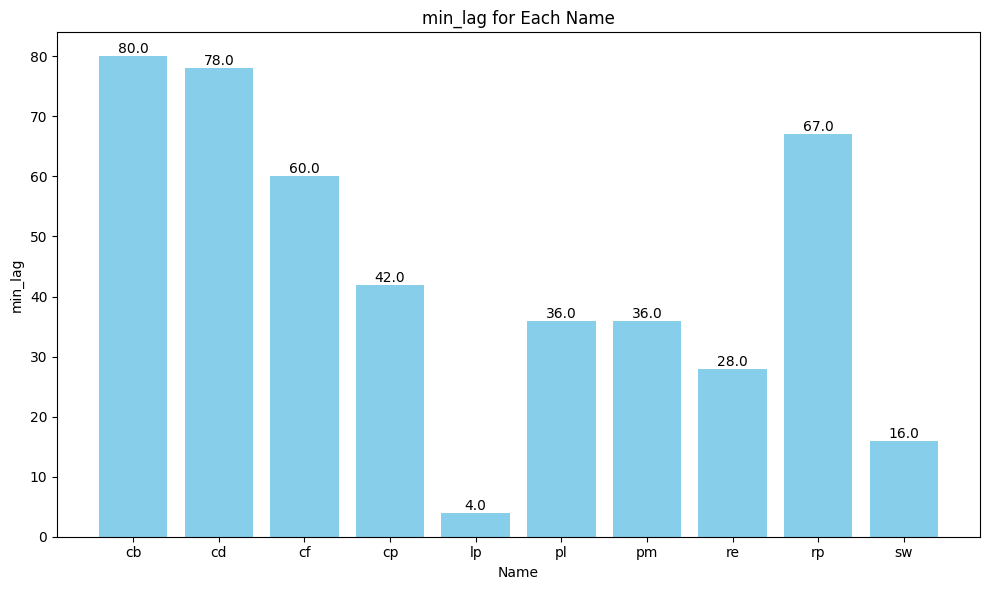

In [22]:
df_plot = df_GANs.dropna(subset=['min_lag']).copy()

# For duplicate names, like 're', we'll take the mean min_lag for simplicity
df_plot = df_plot.groupby('name')['min_lag'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_plot['name'], df_plot['min_lag'], color='skyblue')

# Add labels and title
plt.xlabel('Name')
plt.ylabel('min_lag')
plt.title('min_lag for Each Name')

# Add the value on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
print(df_GANs['min_lag'].mean())

39.2


In [30]:
df_GANs.describe()

,precision,recall,f1_score,min_lag
count,10.000000,10.0,10.000000,10.00000
mean,0.800000,1.0,0.866660,39.20000
std,0.258199,0.0,0.172141,21.37392
min,0.500000,1.0,0.666600,0.00000
25%,0.500000,1.0,0.666667,27.00000
50%,1.000000,1.0,1.000000,39.00000
75%,1.000000,1.0,1.000000,57.75000
max,1.000000,1.0,1.000000,67.00000


In [25]:
df_prefixCDD.describe()

,precision,recall,f1_score,min_lag
count,10.000000,10.0,10.000000,10.000000
mean,0.900000,1.0,0.932667,66.600000
std,0.210819,0.0,0.141960,34.085513
min,0.500000,1.0,0.660000,10.000000
25%,1.000000,1.0,1.000000,50.500000
50%,1.000000,1.0,1.000000,64.000000
75%,1.000000,1.0,1.000000,69.000000
max,1.000000,1.0,1.000000,137.000000
